In [2]:
import glob
import os.path as ops
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm

import torch
import PIL

from autoencoder import Autoencoder
from dataloader import dataloader, val_transform
from utils import show_image, std, mean

In [3]:
# change if you have cuda
device = 'cpu'

autoencoder = Autoencoder(128)
autoencoder.load_state_dict(torch.load('model/th', map_location=device))

autoencoder.eval()
encoder = autoencoder.encoder
decoder = autoencoder.decoder

# # UNCOMMENT FOR PREDICT EMBEDDINGS
# train_loader, val_loader, _ = dataloader(root='data/', batch_size=16, 
#                                          shuffle=True, transform=False, 
#                                          drop_last=False)
# codes = []
# filenames = []
# with torch.no_grad():
#     for train_batch, filename in tqdm(train_loader):
#         codes.extend(encoder(train_batch).numpy())
#         filenames.extend(filename)
        
#     for val_batch, filename in tqdm(val_loader):
#         codes.extend(encoder(val_batch).numpy())
#         filenames.extend(filename)
# np.save('codes.npy', codes)
# np.save('filenames.npy', filenames)

# # OR LOAD PREDICTED
codes = np.load('codes.npy')
filenames = np.load('filenames.npy')
assert len(codes) == len(filenames), 'Not Valid Codes'

RuntimeError: Error(s) in loading state_dict for Autoencoder:
	Missing key(s) in state_dict: "encoder.conv_1.1.weight", "encoder.conv_1.1.bias", "encoder.conv_1.1.running_mean", "encoder.conv_1.1.running_var", "encoder.conv_2.1.weight", "encoder.conv_2.1.bias", "encoder.conv_2.1.running_mean", "encoder.conv_2.1.running_var", "encoder.conv_3.1.weight", "encoder.conv_3.1.bias", "encoder.conv_3.1.running_mean", "encoder.conv_3.1.running_var", "encoder.conv_4.1.weight", "encoder.conv_4.1.bias", "encoder.conv_4.1.running_mean", "encoder.conv_4.1.running_var", "encoder.conv_5.1.weight", "encoder.conv_5.1.bias", "encoder.conv_5.1.running_mean", "encoder.conv_5.1.running_var", "encoder.conv_6.1.weight", "encoder.conv_6.1.bias", "encoder.conv_6.1.running_mean", "encoder.conv_6.1.running_var", "decoder.deconv_1.1.weight", "decoder.deconv_1.1.bias", "decoder.deconv_1.1.running_mean", "decoder.deconv_1.1.running_var", "decoder.deconv_2.1.weight", "decoder.deconv_2.1.bias", "decoder.deconv_2.1.running_mean", "decoder.deconv_2.1.running_var", "decoder.deconv_3.1.weight", "decoder.deconv_3.1.bias", "decoder.deconv_3.1.running_mean", "decoder.deconv_3.1.running_var", "decoder.deconv_4.1.weight", "decoder.deconv_4.1.bias", "decoder.deconv_4.1.running_mean", "decoder.deconv_4.1.running_var", "decoder.deconv_5.1.weight", "decoder.deconv_5.1.bias", "decoder.deconv_5.1.running_mean", "decoder.deconv_5.1.running_var", "decoder.deconv_6.1.weight", "decoder.deconv_6.1.bias", "decoder.deconv_6.1.running_mean", "decoder.deconv_6.1.running_var", "decoder.deconv_7.1.weight", "decoder.deconv_7.1.bias", "decoder.deconv_7.1.running_mean", "decoder.deconv_7.1.running_var". 
	Unexpected key(s) in state_dict: "encoder.conv_1.2.weight", "encoder.conv_1.2.bias", "encoder.conv_1.2.running_mean", "encoder.conv_1.2.running_var", "encoder.conv_1.2.num_batches_tracked", "encoder.conv_2.2.weight", "encoder.conv_2.2.bias", "encoder.conv_2.2.running_mean", "encoder.conv_2.2.running_var", "encoder.conv_2.2.num_batches_tracked", "encoder.conv_3.2.weight", "encoder.conv_3.2.bias", "encoder.conv_3.2.running_mean", "encoder.conv_3.2.running_var", "encoder.conv_3.2.num_batches_tracked", "encoder.conv_4.2.weight", "encoder.conv_4.2.bias", "encoder.conv_4.2.running_mean", "encoder.conv_4.2.running_var", "encoder.conv_4.2.num_batches_tracked", "encoder.conv_5.2.weight", "encoder.conv_5.2.bias", "encoder.conv_5.2.running_mean", "encoder.conv_5.2.running_var", "encoder.conv_5.2.num_batches_tracked", "encoder.conv_6.2.weight", "encoder.conv_6.2.bias", "encoder.conv_6.2.running_mean", "encoder.conv_6.2.running_var", "encoder.conv_6.2.num_batches_tracked", "decoder.deconv_1.2.weight", "decoder.deconv_1.2.bias", "decoder.deconv_1.2.running_mean", "decoder.deconv_1.2.running_var", "decoder.deconv_1.2.num_batches_tracked", "decoder.deconv_2.2.weight", "decoder.deconv_2.2.bias", "decoder.deconv_2.2.running_mean", "decoder.deconv_2.2.running_var", "decoder.deconv_2.2.num_batches_tracked", "decoder.deconv_3.2.weight", "decoder.deconv_3.2.bias", "decoder.deconv_3.2.running_mean", "decoder.deconv_3.2.running_var", "decoder.deconv_3.2.num_batches_tracked", "decoder.deconv_4.2.weight", "decoder.deconv_4.2.bias", "decoder.deconv_4.2.running_mean", "decoder.deconv_4.2.running_var", "decoder.deconv_4.2.num_batches_tracked", "decoder.deconv_5.2.weight", "decoder.deconv_5.2.bias", "decoder.deconv_5.2.running_mean", "decoder.deconv_5.2.running_var", "decoder.deconv_5.2.num_batches_tracked", "decoder.deconv_6.2.weight", "decoder.deconv_6.2.bias", "decoder.deconv_6.2.running_mean", "decoder.deconv_6.2.running_var", "decoder.deconv_6.2.num_batches_tracked", "decoder.deconv_7.2.weight", "decoder.deconv_7.2.bias", "decoder.deconv_7.2.running_mean", "decoder.deconv_7.2.running_var", "decoder.deconv_7.2.num_batches_tracked". 

587729776368484424


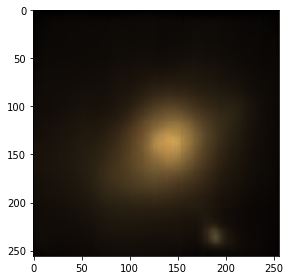

In [3]:
idx = 84
with torch.no_grad():
    tensor_codes = torch.Tensor(codes[idx])[None]
    show_image(decoder(tensor_codes)[0].permute(1, 2, 0).numpy())
    print(filenames[idx].replace('.jpg', ''))

## Find similar

In [24]:
def get_image_path_by_id(idx):
    if ops.exists('data/train/data/' + idx):
        return 'data/train/data/' + idx
    elif ops.exists('data/val/data/' + idx):
        return 'data/val/data/' + idx
    
get_image_path_by_id = np.vectorize(get_image_path_by_id)

In [9]:
test_images = []
test_codes = []
img_paths = glob.glob('examples/*.jpg') \
            + glob.glob('examples/*.jpeg') \
            + glob.glob('examples/*.png') 
with torch.no_grad():
    for path in img_paths:
        pil_img = PIL.Image.fromarray(plt.imread(path))
        test_images.append(pil_img)
        test_codes.append(encoder(val_transform(pil_img)[None])[0].numpy())

In [11]:
from sklearn.neighbors import NearestNeighbors

In [12]:
nn = NearestNeighbors()

In [13]:
nn.fit(codes, y=filenames)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [16]:
dist, idx = nn.kneighbors(test_codes)

In [42]:
io.imread_collection(get_image_path_by_id(filenames[idx][0]))

In [30]:
get_image_path_by_id(filenames[idx][0])

array(['data/val/data/587725818552713323.jpg',
       'data/train/data/587739607546658901.jpg',
       'data/train/data/587738410859495478.jpg',
       'data/train/data/587735348038533272.jpg',
       'data/train/data/587738572457967665.jpg'], dtype='<U38')

In [36]:
imread(['data/val/data/587725818552713323.jpg'])

ValueError: setting an array element with a sequence.